In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

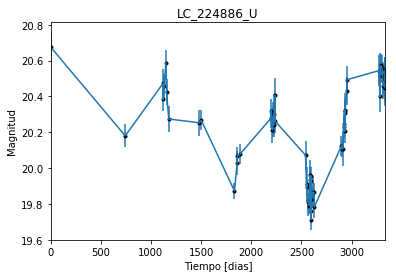

In [2]:
data = np.genfromtxt('LC_224886_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_224886_U')
plt.savefig("LC_224886_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

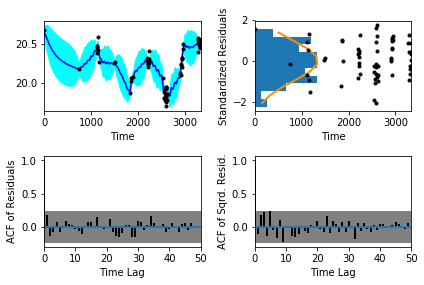

In [5]:
sample.assess_fit()

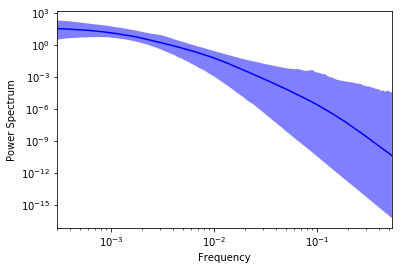

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

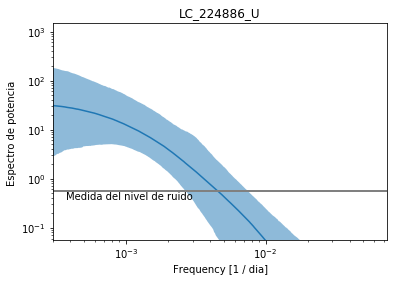

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_224886_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_224886_U')

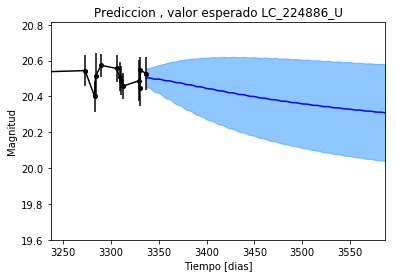

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_224886_U')

Text(0.5,1,'Prediccion, Caminos simulados_LC_224886_U')

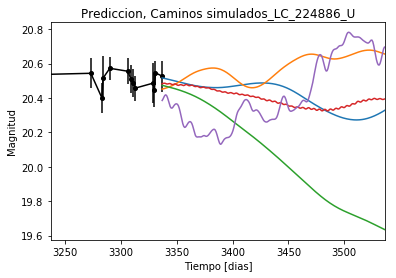

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_224886_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


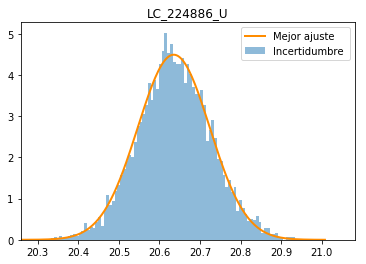

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_224886_U')
plt.savefig("Mejor_ajuste_LC_224886_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_224886_U')

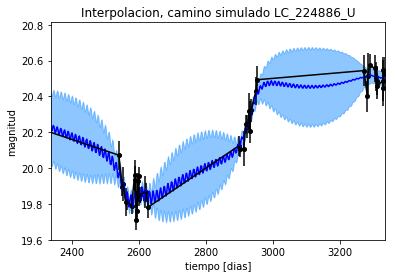

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_224886_U')

Text(0.5,1,'Interpolacion, camino simulado LC_224886_U')

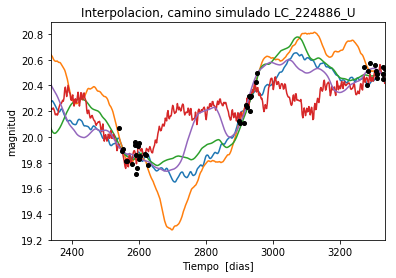

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_224886_U')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 605.536469771
Median: 0.0111069598021
Standard deviation: 0.203050273953
68% credibility interval: [ 0.00104363  0.18758153]
95% credibility interval: [  3.65466639e-04   8.03805333e-01]
99% credibility interval: [  3.04562423e-04   1.00926658e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 557.438475431
Median: 0.00271771607518
Standard deviation: 0.0926628184028
68% credibility interval: [ 0.00054397  0.02881173]
95% credibility interval: [ 0.00032505  0.27063464]
99% credibility interval: [  3.03169615e-04   6.91832927e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 325.985317054
Median: 0.0267655329743
Standard 

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1449.04899309
Median: 89.4879044422
Standard deviation: 1.71376951088
68% credibility interval: [ 87.61265616  90.58562717]
95% credibility interval: [ 84.84127003  91.53874202]
99% credibility interval: [ 82.42649714  92.14740528]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 524.653951551
Median: 0.747918536545
Standard deviation: 2.28501293585
68% credibility interval: [ 0.06769258  4.04418875]
95% credibility interval: [ 0.0168354   7.81539376]
99% credibility interval: [  0.01094332  10.89011124]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 808.320115729
Median: 0.472437330133
Standard deviation: 9.30094394047
68% credibility interval: [ 0.02336922  7.90092976]
95% credibility interval: [  1.46917678e

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 5893.31455076
Median: 2.30605797456e-29
Standard deviation: 5.32567906972e+38
68% credibility interval: [  1.95023643e-72   1.28620858e-01]
95% credibility interval: [  3.03935525e-103   1.79958893e+024]
99% credibility interval: [  3.85637560e-114   9.37394322e+034]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3042.0633537
Median: 20.275388223
Standard deviation: 0.134012234408
68% credibility interval: [ 20.17625148  20.39830485]
95% credibility interval: [ 20.04701682  20.57642747]
99% credibility interval: [ 19.88900818  20.7578822 ]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 320.718917646
Median: 0.00672831121309
Standard deviation: 0.237376560717
68% credibility interval: [ 0.          0.32318258]
95% credibility interval: [ 0.          0.86724487]
99% credibility interval: [ 0.          1.01331316]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 320.718917646
Median: 0.00672831121309
Standard deviation: 0.237376560717
68% credibility interval: [ 0.          0.32318258]
95% credibility interval: [ 0.          0.86724487]
99% credibility interval: [ 0.          1.01331316]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 884.237099435
Median: 0.0
Standard deviation: 0.00056453909331
68% c

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1449.04899309
Median: 89.4879044422
Standard deviation: 1.71376951088
68% credibility interval: [ 87.61265616  90.58562717]
95% credibility interval: [ 84.84127003  91.53874202]
99% credibility interval: [ 82.42649714  92.14740528]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2430.28112649
Median: 0.0815324483085
Standard deviation: 0.0954652813107
68% credibility interval: [ 0.05008985  0.14319191]
95% credibility interval: [ 0.03416514  0.31098275]
99% credibility interval: [ 0.02702271  0.59360487]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2502.56026418
Median: 0.971688642531
Standard deviation: 0.155236956984
68% credibility interval: [ 0.83211475  1.13571458]
95% credibility interval: [ 0.72387916  1.32097761]
99% credibility interval: [ 0.66020982  1.46879516]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 559.81473771
Median: 0.000454056772407
Standard deviation: 0.233314096346
68% credibility interval: [  2.74264804e-06   1.14250439e-02]
95% credibility interval: [  7.58717069e-27   2.59206996e-01]
99% credibility interval: [  2.07666541e-38   1.88803767e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 605.536469771
Median: (-0.0697870866361+0j)
Standard deviation: 1.96269899479
68% credibility interval: [-1.17860951+0.j         -0.00655730-0.45503699j]
95% credibility interval: [ -5.05045786e+00+0.j          -2.29629461e-03-3.61097952j]
99% credibility interval: [ -6.34140896e+00+0.j         -1.91362214e-03-0.0916674j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 557.438475431
Median: (-0.0170759137126+0.751945696045j)
Standard deviation: 1.60109110703
68% credibility interval: [-0.18102942+1.11494728j -0.00341786+0.006779j  ]
95% credibility interval: [-1.70044761+0.j         -0.00204235+0.01243576j]
99% credibility interval: [ -4.34691448e+00 +4.44060960e+00j  -1.90487087e-03 +4.03405892e-03j]
Posterior summary